In [73]:
import pandas as pd
import seaborn as sns
import numpy as np

In [74]:
file = 'aluguel.csv'

In [75]:
df = pd.read_csv(file, 
                 encoding='utf-8', 
                 sep=';',
                 skiprows=1, 
                 usecols=[0,1,2,3,4,5,6,7,8], 
                 names=['Tipo','Bairro','Quartos','Vagas','Suites','Area','Valor','Condominio','IPTU'], 
                 )

display(df)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [77]:
df.isna().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

In [78]:
df[df.isna().any(axis=1)]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [79]:
filtro = df['IPTU'].isna()

In [80]:
df[filtro][
    ['IPTU', 'Condominio', 'Valor']
]

,IPTU,Condominio,Valor
1,NaN,NaN,7000.0
4,NaN,230.0,800.0
5,NaN,NaN,1200.0
7,NaN,NaN,22000.0
8,NaN,NaN,1000.0
...,...,...,...
32942,NaN,1096.0,2000.0
32944,NaN,790.0,1550.0
32951,NaN,550.0,1000.0
32954,NaN,NaN,14000.0


In [81]:
df['IPTU'].fillna(
    np.ceil(
        df['Valor'] - df['Condominio']
    ),
    inplace=True 
)

In [82]:
df.isna().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor           17
Condominio    4093
IPTU          2535
dtype: int64

In [83]:
filtro_valor = df['Valor'].isna()

In [84]:
df[filtro_valor][
    ['Valor', 'Condominio', 'IPTU']
]

,Valor,Condominio,IPTU
76,NaN,970.0,68.0
2186,NaN,878.0,NaN
2456,NaN,NaN,NaN
2646,NaN,NaN,NaN
2941,NaN,1010.0,170.0
2973,NaN,850.0,NaN
6598,NaN,NaN,1140.0
7302,NaN,NaN,NaN
12683,NaN,878.0,NaN
13229,NaN,910.0,228.0


In [85]:
df['Valor'].fillna(
    np.ceil(
        df['Condominio'] + df['IPTU']
    ),
    inplace=True
)

In [86]:
df.isna().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor           11
Condominio    4093
IPTU          2535
dtype: int64

In [87]:
filtro_condominio = df['Condominio'].isna()

In [88]:
df[filtro_condominio][
    ['Condominio', 'Valor', 'IPTU']
]

,Condominio,Valor,IPTU
1,NaN,7000.0,NaN
5,NaN,1200.0,NaN
7,NaN,22000.0,NaN
8,NaN,1000.0,NaN
10,NaN,1200.0,NaN
...,...,...,...
32914,NaN,2650.0,NaN
32928,NaN,25000.0,1113.0
32929,NaN,5800.0,215.0
32931,NaN,5000.0,80.0


In [89]:
df['Condominio'].fillna(
    np.ceil(
        df['Valor'] - df['IPTU']
    ),
    inplace=True
)

In [90]:
df.isna().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor           11
Condominio    2529
IPTU          2535
dtype: int64

In [91]:
colunas_drop = ['IPTU', 'Valor', 'Condominio']

df[colunas_drop].isna().any(axis=1).sum()

df_tratado = df.dropna(subset=colunas_drop).copy()


In [92]:
df_tratado.isna().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [93]:
df_tratado.reset_index(drop=True, inplace=True)
df_tratado

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,570.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
30419,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
30420,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
30421,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
30422,Apartamento,Leblon,2,0,0,70,3000.0,760.0,2240.0


In [94]:
filtro_duplicata = df_tratado.duplicated()

In [95]:
df_tratado[filtro_duplicata]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
315,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0
1062,Apartamento,Botafogo,1,0,0,35,1000.0,293.0,86.0
1206,Apartamento,Leblon,4,2,2,230,17900.0,5000.0,1000.0
1367,Conjunto Comercial/Sala,Leblon,0,0,0,150,25000.0,2400.0,694.0
1371,Apartamento,Ipanema,3,1,0,80,4000.0,1200.0,251.0
...,...,...,...,...,...,...,...,...,...
30266,Conjunto Comercial/Sala,Centro,0,0,0,406,19500.0,9194.0,1998.0
30279,Loja/Salão,Barra da Tijuca,0,1,0,49,3000.0,864.0,2136.0
30283,Apartamento,Ipanema,4,2,1,257,8000.0,2800.0,680.0
30350,Conjunto Comercial/Sala,Recreio dos Bandeirantes,0,1,0,32,1500.0,360.0,130.0


In [96]:
df_tratado.drop_duplicates(inplace=True)

In [97]:
df_tratado.duplicated().sum()


0

In [98]:
#df_tratado.groupby('Tipo')['Valor'].mean(numeric_only=True)
df_tratado.groupby('Tipo')['Valor'].mean()

Tipo
Apartamento                      4768.960432
Box/Garagem                      3166.857143
Casa                             9802.502083
Casa Comercial                  13184.728261
Casa de Condomínio              12186.199549
Casa de Vila                     2007.388060
Conjunto Comercial/Sala         13873.820649
Flat                             4416.254762
Galpão/Depósito/Armazém         71541.903743
Hotel                           25000.000000
Loft                             2579.829787
Loja Shopping/ Ct Comercial      6620.692641
Loja/Salão                      12200.973803
Loteamento/Condomínio           26333.333333
Pousada/Chalé                    1480.000000
Prédio Inteiro                 755950.497268
Quitinete                        1264.336364
Studio                           2400.000000
Sítio                           14600.000000
Terreno Padrão                  30115.945946
Name: Valor, dtype: float64

In [99]:
df_preco_tipo = df_tratado.groupby('Tipo')[['Valor']].mean().sort_values(by='Valor')

In [100]:
df_preco_tipo_index = df_preco_tipo.reset_index().copy()

In [101]:
df_preco_tipo_index['Valor'] = df_preco_tipo_index['Valor'].astype(float)
df_preco_tipo_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tipo    20 non-null     object 
 1   Valor   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


<Axes: xlabel='Tipo'>

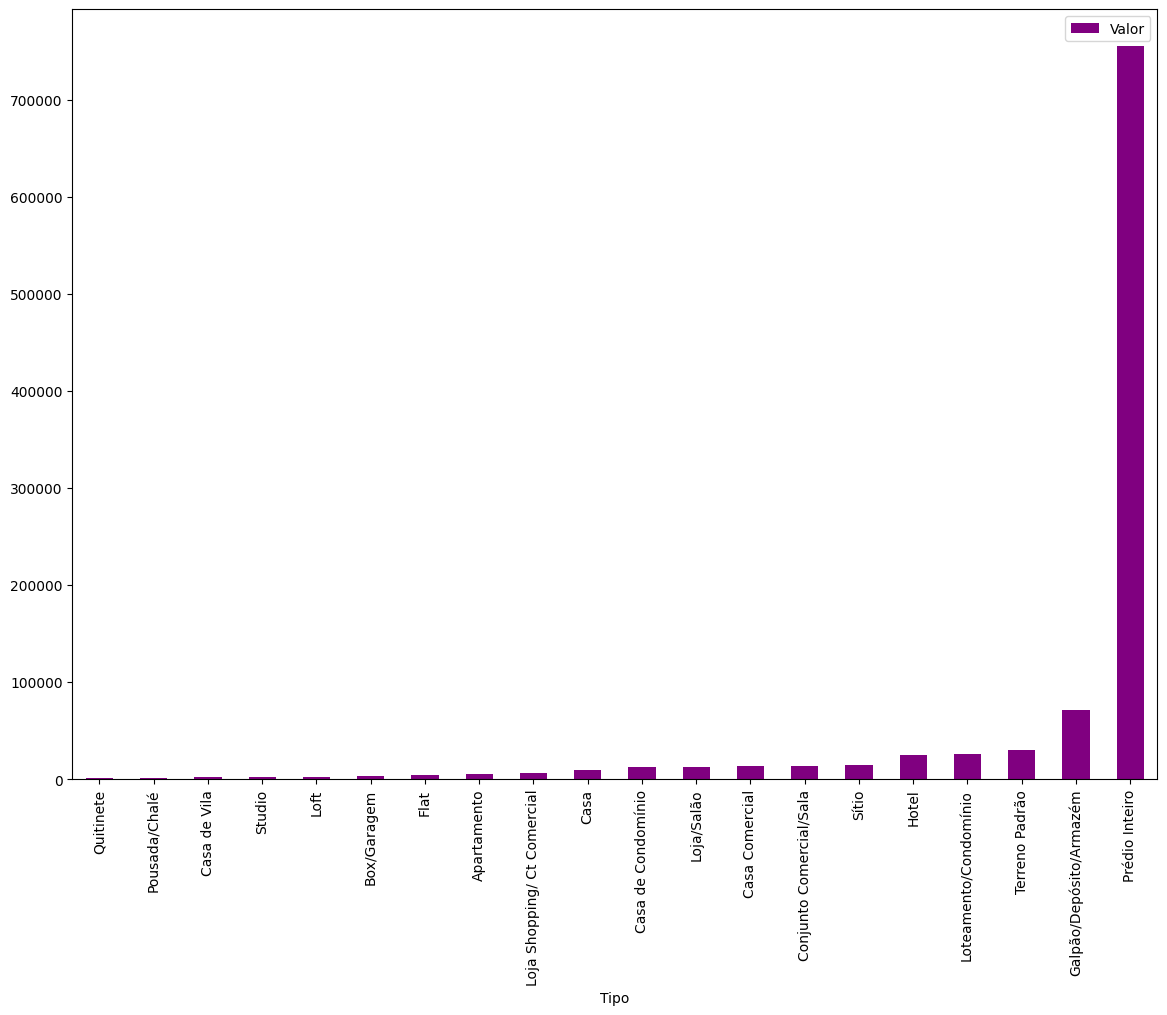

In [102]:
df_preco_tipo_index.plot(kind='bar', x='Tipo', y='Valor', figsize=(14,10), color='purple')

In [103]:
df_tratado.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,29379.000000,29379.000000,29379.000000,29379.000000,2.937900e+04,2.937900e+04,2.937900e+04
mean,1.801933,1.761054,0.687906,202.670104,1.280350e+04,6.787595e+03,3.382577e+03
std,1.512316,21.470225,1.192817,705.326085,7.066121e+05,7.236328e+05,1.605681e+05
min,0.000000,0.000000,0.000000,0.000000,8.400000e+01,-2.672307e+07,-7.150000e+04
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,6.000000e+02,1.400000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,1.006000e+03,4.000000e+02
75%,3.000000,2.000000,1.000000,166.000000,6.300000e+03,1.970000e+03,1.206000e+03
max,27.000000,1966.000000,70.000000,31800.000000,1.200000e+08,1.199900e+08,2.705307e+07


In [104]:
for coluna in df_preco_tipo_index.columns:
    print(f'Colunas: {coluna}')
    print(df_preco_tipo_index[coluna].unique)
    print('-' * 30)

Colunas: Tipo
<bound method Series.unique of 0                       Quitinete
1                   Pousada/Chalé
2                    Casa de Vila
3                          Studio
4                            Loft
5                     Box/Garagem
6                            Flat
7                     Apartamento
8     Loja Shopping/ Ct Comercial
9                            Casa
10             Casa de Condomínio
11                     Loja/Salão
12                 Casa Comercial
13        Conjunto Comercial/Sala
14                          Sítio
15                          Hotel
16          Loteamento/Condomínio
17                 Terreno Padrão
18        Galpão/Depósito/Armazém
19                 Prédio Inteiro
Name: Tipo, dtype: object>
------------------------------
Colunas: Valor
<bound method Series.unique of 0       1264.336364
1       1480.000000
2       2007.388060
3       2400.000000
4       2579.829787
5       3166.857143
6       4416.254762
7       4768.960432
8       662

In [106]:
df_preco_tipo_index['Tipo'].unique()

array(['Quitinete', 'Pousada/Chalé', 'Casa de Vila', 'Studio', 'Loft',
       'Box/Garagem', 'Flat', 'Apartamento',
       'Loja Shopping/ Ct Comercial', 'Casa', 'Casa de Condomínio',
       'Loja/Salão', 'Casa Comercial', 'Conjunto Comercial/Sala', 'Sítio',
       'Hotel', 'Loteamento/Condomínio', 'Terreno Padrão',
       'Galpão/Depósito/Armazém', 'Prédio Inteiro'], dtype=object)

In [108]:
imoveis_comerciais = ['Pousada/Chalé', 'Loja Shopping/ Ct Comercial','Loja/Salão','Casa Comercial','Galpão/Depósito/Armazém']

In [120]:
df_preco_tipo_index_residenciais = df_preco_tipo_index.query('@imoveis_comerciais not in Tipo').copy()
#df_preco_tipo_index = df_preco_tipo_index.drop(imoveis_comerciais)

In [126]:
df_preco_tipo_index_residenciais.query('Tipo == "Apartamento"')

,Tipo,Valor
7,Apartamento,4768.960432


In [121]:
df_preco_tipo_index_residenciais

,Tipo,Valor
0,Quitinete,1264.336364
2,Casa de Vila,2007.388060
3,Studio,2400.000000
4,Loft,2579.829787
5,Box/Garagem,3166.857143
6,Flat,4416.254762
7,Apartamento,4768.960432
9,Casa,9802.502083
10,Casa de Condomínio,12186.199549
13,Conjunto Comercial/Sala,13873.820649


<Axes: xlabel='Tipo'>

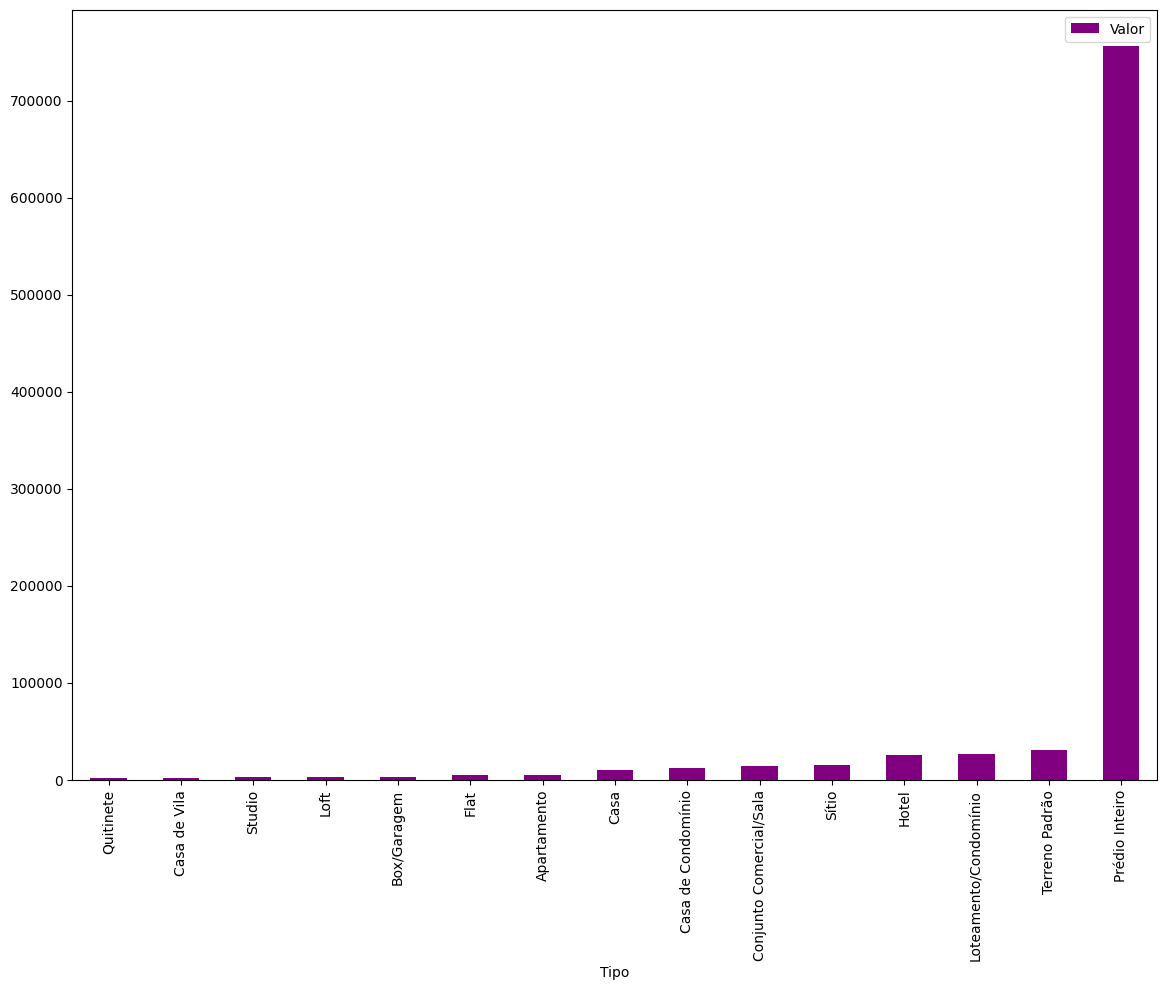

In [122]:
df_preco_tipo_index_residenciais.plot(kind='bar', x='Tipo', y='Valor', figsize=(14,10), color='purple')

In [124]:
df_preco_tipo_index_residenciais['Tipo'].value_counts()

Tipo
Quitinete                  1
Casa de Vila               1
Studio                     1
Loft                       1
Box/Garagem                1
Flat                       1
Apartamento                1
Casa                       1
Casa de Condomínio         1
Conjunto Comercial/Sala    1
Sítio                      1
Hotel                      1
Loteamento/Condomínio      1
Terreno Padrão             1
Prédio Inteiro             1
Name: count, dtype: int64

In [127]:
df['VAlor_por_mes'] = df['Condominio'] + df['Valor']

In [128]:
df['Valor_por_ano'] = (df['VAlor_por_mes'] + df['IPTU'])*12

In [130]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,VAlor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,27120.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,123972.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14520.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,570.0,1030.0,19200.0


In [ ]:
df_tratado.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
30419,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
30420,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
30421,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
30422,Apartamento,Leblon,2,0,0,70,3000.0,760.0,2240.0
30423,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0
